In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup
from scipy.optimize import curve_fit

In [2]:
# Loading the datasets
df1 = pd.read_excel("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/SEIFA_data.xlsx")
df2 = pd.read_excel("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/Demography_New.xlsx")
df3= pd.read_excel("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/AEDC.xlsx")
df4 = pd.read_excel("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/EL Quality Data.xlsx")

In [3]:
# Merge the datasets
merged_df = pd.merge(df1, df2, on='SA2 Name', how='left')
merged_df = pd.merge(merged_df, df3, on='SA2 Name', how='left')
merged_df = pd.merge(merged_df, df4, on='SA2 Name', how='left')

# Display the number of rows in the merged dataframe
print('Number of rows in the merged dataframe:', len(merged_df))

# Display the first few rows of the merged dataframe
merged_df.head()

Number of rows in the merged dataframe: 762


,SA2 Code,SA2 Name,Usual Resident Population,Score,Rank (within Australia),Decile (within Australia),Percentile (within Australia),State_x,Rank (within State or Territory),Decile (within state or territory),...,Developmentally vulnerable (n)(2021),Developmentally vulnerable (%)(2021),Suburb,SA2Code,ELCentres,ExceedingNQS,Excellent,MeetingNQS,SignificantImprovementRequired,WorkingTowardsNQF
0,101021007,Braidwood,4343,1000.677063,1219,6,52,NSW,306,5,...,4,8.333333,Queanbeyan,101021007.0,2.0,0.0,0.0,2.0,0.0,0.0
1,101021008,Karabar,8517,982.313373,1029,5,44,NSW,274,5,...,31,31.632653,Queanbeyan,101021008.0,5.0,2.0,0.0,2.0,0.0,0.0
2,101021009,Queanbeyan,11342,998.123224,1193,6,51,NSW,301,5,...,34,27.419355,Queanbeyan,101021009.0,6.0,3.0,0.0,2.0,0.0,1.0
3,101021010,Queanbeyan - East,5085,1014.994386,1357,6,58,NSW,341,6,...,19,30.645161,Queanbeyan,101021010.0,1.0,0.0,0.0,0.0,0.0,1.0
4,101021012,Queanbeyan West - Jerrabomberra,12744,1107.453507,2092,9,89,NSW,513,9,...,35,17.857143,Queanbeyan,101021012.0,5.0,1.0,0.0,2.0,0.0,1.0


In [4]:
# Drop the 'State_y' column
merged_df = merged_df.drop('State_y', axis=1)

# Rename the 'State_x' column to 'State'
merged_df = merged_df.rename(columns={'State_x': 'State'})

# Display the first few rows of the updated dataframe
merged_df.head()

,SA2 Code,SA2 Name,Usual Resident Population,Score,Rank (within Australia),Decile (within Australia),Percentile (within Australia),State,Rank (within State or Territory),Decile (within state or territory),...,Developmentally vulnerable (n)(2021),Developmentally vulnerable (%)(2021),Suburb,SA2Code,ELCentres,ExceedingNQS,Excellent,MeetingNQS,SignificantImprovementRequired,WorkingTowardsNQF
0,101021007,Braidwood,4343,1000.677063,1219,6,52,NSW,306,5,...,4,8.333333,Queanbeyan,101021007.0,2.0,0.0,0.0,2.0,0.0,0.0
1,101021008,Karabar,8517,982.313373,1029,5,44,NSW,274,5,...,31,31.632653,Queanbeyan,101021008.0,5.0,2.0,0.0,2.0,0.0,0.0
2,101021009,Queanbeyan,11342,998.123224,1193,6,51,NSW,301,5,...,34,27.419355,Queanbeyan,101021009.0,6.0,3.0,0.0,2.0,0.0,1.0
3,101021010,Queanbeyan - East,5085,1014.994386,1357,6,58,NSW,341,6,...,19,30.645161,Queanbeyan,101021010.0,1.0,0.0,0.0,0.0,0.0,1.0
4,101021012,Queanbeyan West - Jerrabomberra,12744,1107.453507,2092,9,89,NSW,513,9,...,35,17.857143,Queanbeyan,101021012.0,5.0,1.0,0.0,2.0,0.0,1.0


**Cleaning the Data**

In [5]:
print(merged_df.count())

SA2 Code                                                  762
SA2 Name                                                  762
Usual Resident Population                                 762
Score                                                     762
Rank (within Australia)                                   762
Decile (within Australia)                                 762
Percentile (within Australia)                             762
State                                                     762
Rank (within State or Territory)                          762
Decile (within state or territory)                        762
Percentile (within state or territory)                    762
Minimum score for SA1s in area                            762
Maximum score for SA1s in area                            762
% Usual Resident Population without an SA1 level score    762
0 year                                                    739
1 year                                                    739
2 year  

How should the null values be fixed ? Should they be left as it is ? Or should I replace them with mean/median or any other machine learning techniques. If I do so, the results of the analyse would lack accuracy.

Edit: After Discussing with Ze it is best to leave the values null and focus on the rows with complete data so that the accuracy of the analysis is the best. 

In [6]:
# Checking for missing values
merged_df.isnull().sum()

SA2 Code                                                    0
SA2 Name                                                    0
Usual Resident Population                                   0
Score                                                       0
Rank (within Australia)                                     0
Decile (within Australia)                                   0
Percentile (within Australia)                               0
State                                                       0
Rank (within State or Territory)                            0
Decile (within state or territory)                          0
Percentile (within state or territory)                      0
Minimum score for SA1s in area                              0
Maximum score for SA1s in area                              0
% Usual Resident Population without an SA1 level score      0
0 year                                                     23
1 year                                                     23
2 year  

**Understanding the Data**

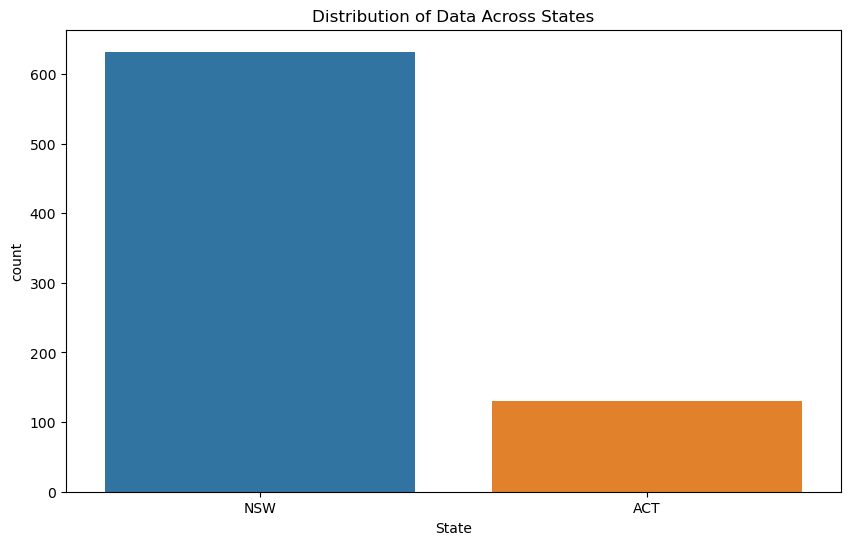

In [7]:
# Bar Plot for 'State'
plt.figure(figsize=(10,6))
sns.countplot(x='State', data=merged_df)
plt.title('Distribution of Data Across States')
plt.show()

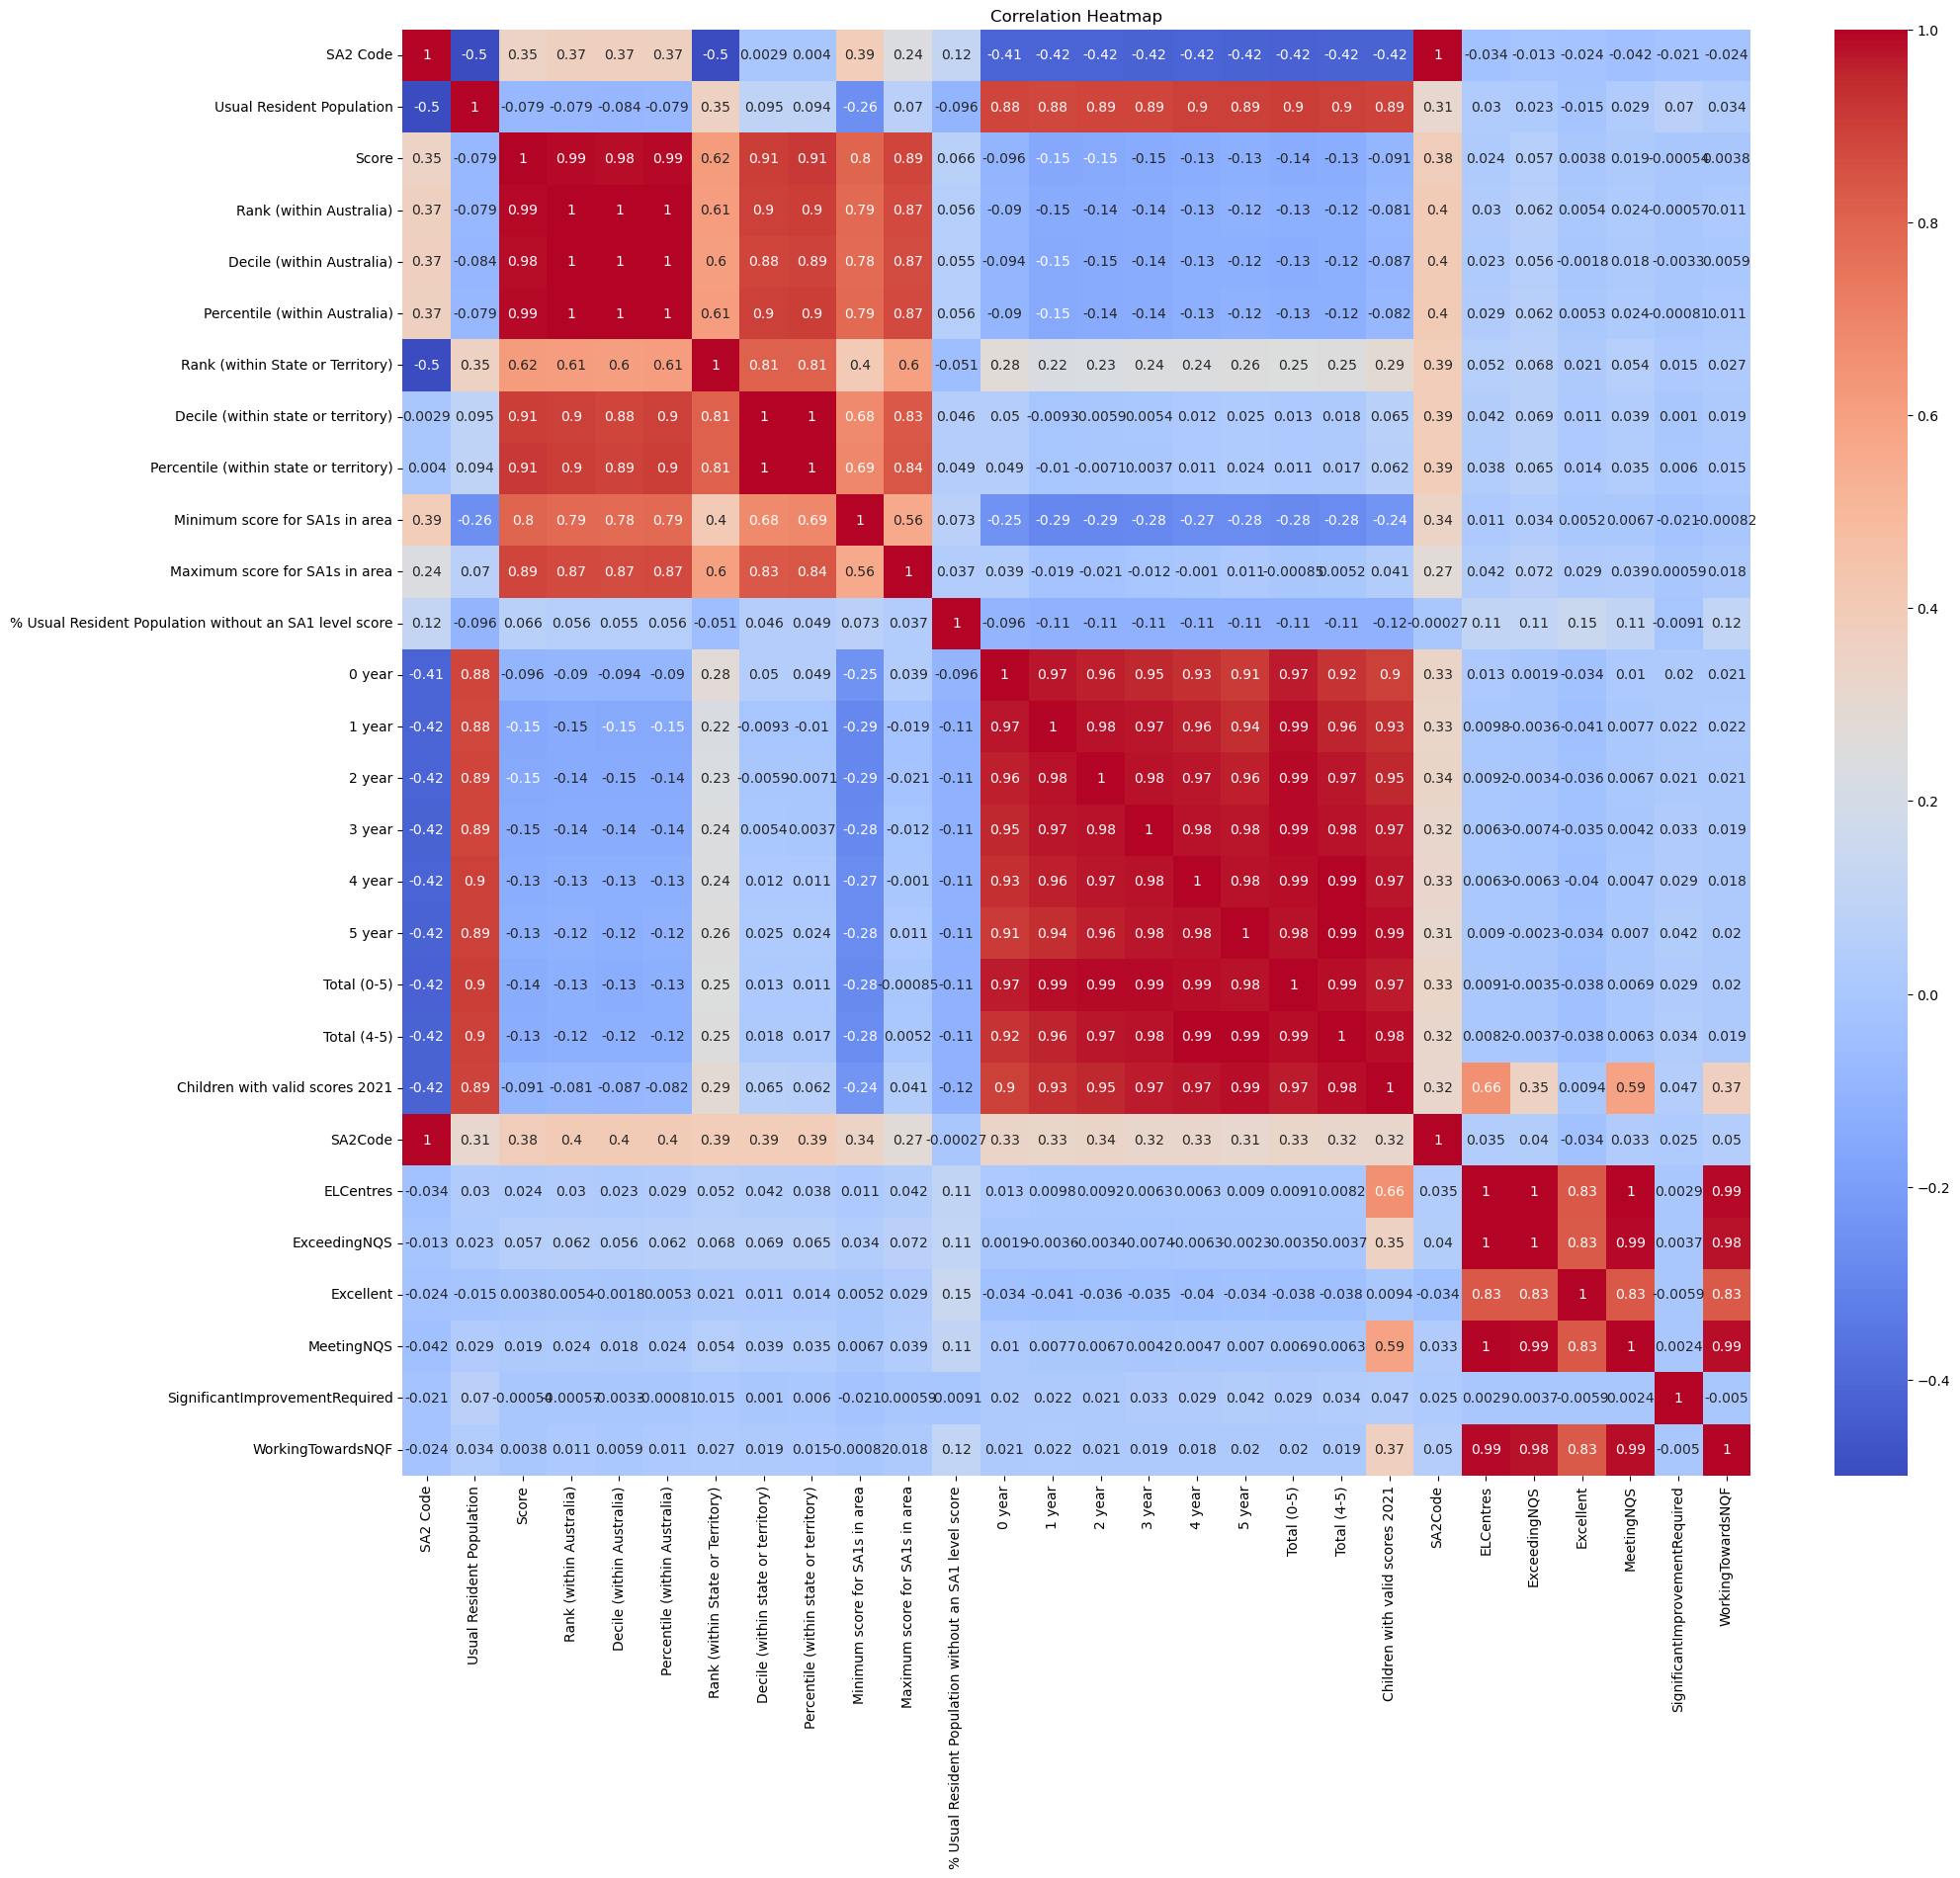

In [8]:
# Select only the numeric columns from the dataframe
numeric_cols = merged_df.select_dtypes(include=[np.number])

# Now compute the correlation on the numeric columns
correlation = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(22,19))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

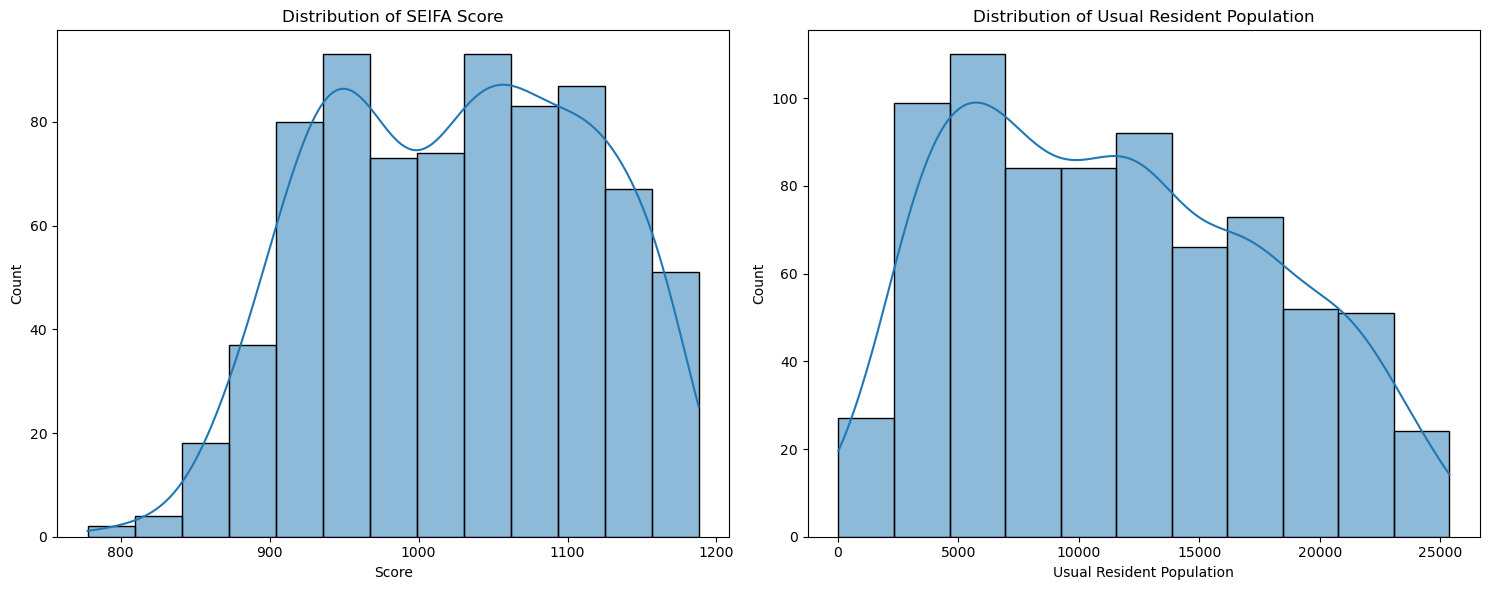

In [9]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 'Number of Developmentally vulnerable children'
sns.histplot(data=merged_df, x='Score', kde=True, ax=axs[0])
axs[0].set_title('Distribution of SEIFA Score')

# Histogram for 'Usual Resident Population'
sns.histplot(data=merged_df, x='Usual Resident Population', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Usual Resident Population')

# Display the plots
plt.tight_layout()
plt.show()


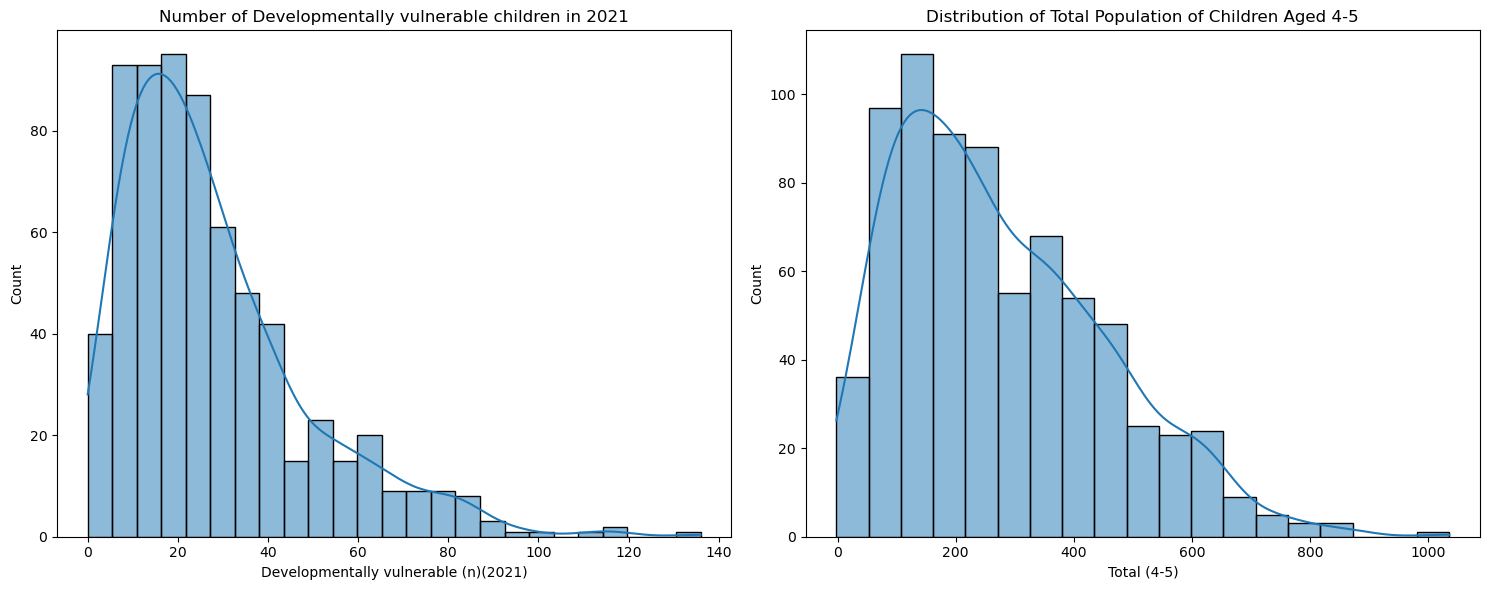

In [10]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 'Number of Developmentally vulnerable children'
merged_df['Developmentally vulnerable (n)(2021)'] = pd.to_numeric(merged_df['Developmentally vulnerable (n)(2021)'], errors='coerce')
sns.histplot(data=merged_df, x='Developmentally vulnerable (n)(2021)', kde=True, ax=axs[0])
axs[0].set_title('Number of Developmentally vulnerable children in 2021')

# Plot 'Total (4-5)'
sns.histplot(data=merged_df, x='Total (4-5)', kde=True, ax=axs[1])
axs[1].set_title('Distribution of Total Population of Children Aged 4-5')

# Display the plots
plt.tight_layout()
plt.show()


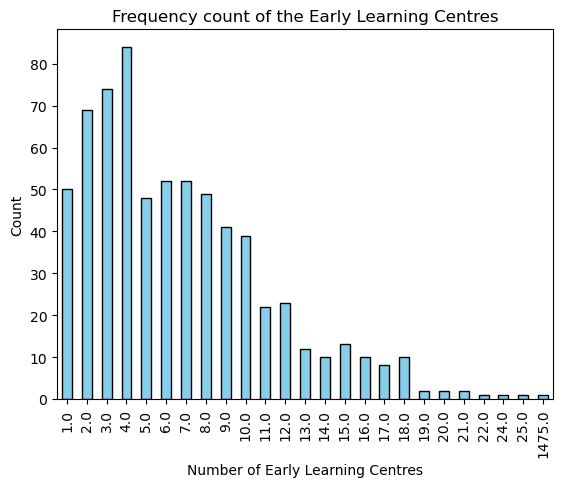

In [11]:
merged_df['ELCentres'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency count of the Early Learning Centres')
plt.xlabel('Number of Early Learning Centres')
plt.ylabel('Count')
plt.show()

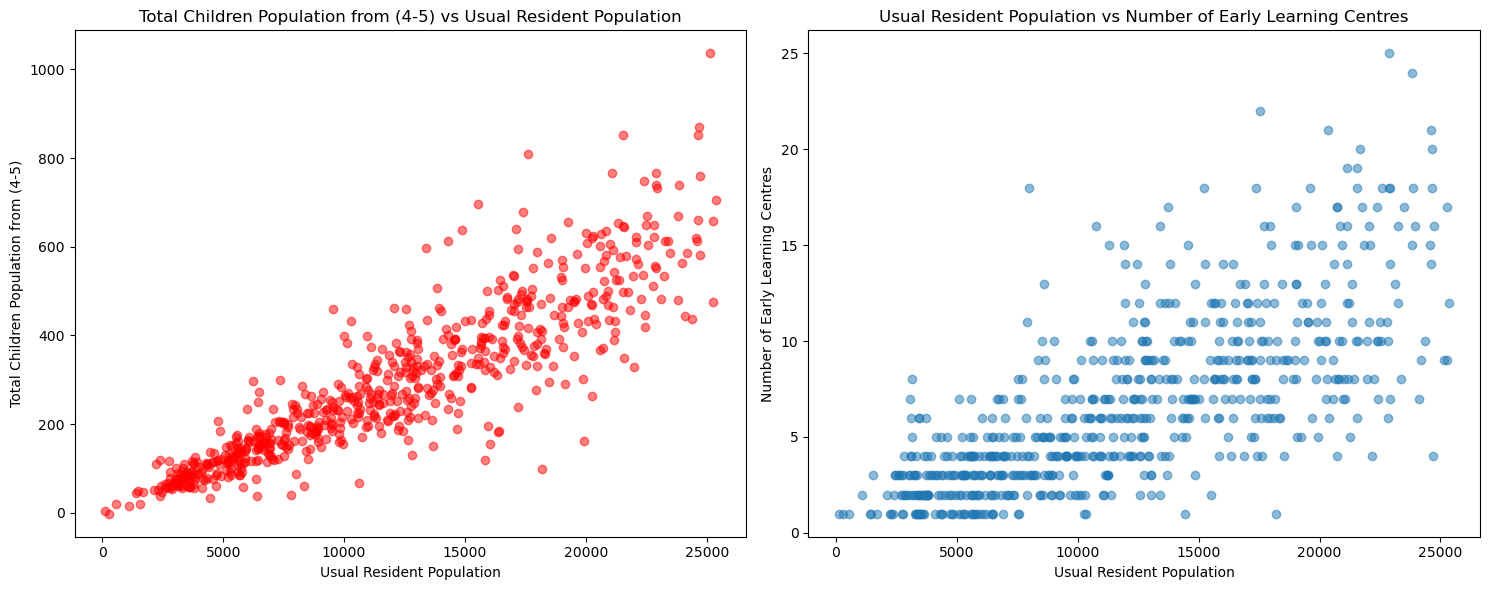

In [12]:
# Removing the outlier
merged_dataset = merged_df[merged_df['ELCentres'] < 100]

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 'Total (0-5)'
axs[0].scatter(merged_dataset['Usual Resident Population'], merged_dataset['Total (4-5)'], alpha=0.5, color='red')
axs[0].set_title('Total Children Population from (4-5) vs Usual Resident Population')
axs[0].set_xlabel('Usual Resident Population')
axs[0].set_ylabel('Total Children Population from (4-5)')

# Plot 'Total (4-5)'
axs[1].scatter(merged_dataset['Usual Resident Population'], merged_dataset['ELCentres'], alpha=0.5)
axs[1].set_title('Usual Resident Population vs Number of Early Learning Centres')
axs[1].set_xlabel('Usual Resident Population')
axs[1].set_ylabel('Number of Early Learning Centres')

# Display the plots
plt.tight_layout()
plt.show()

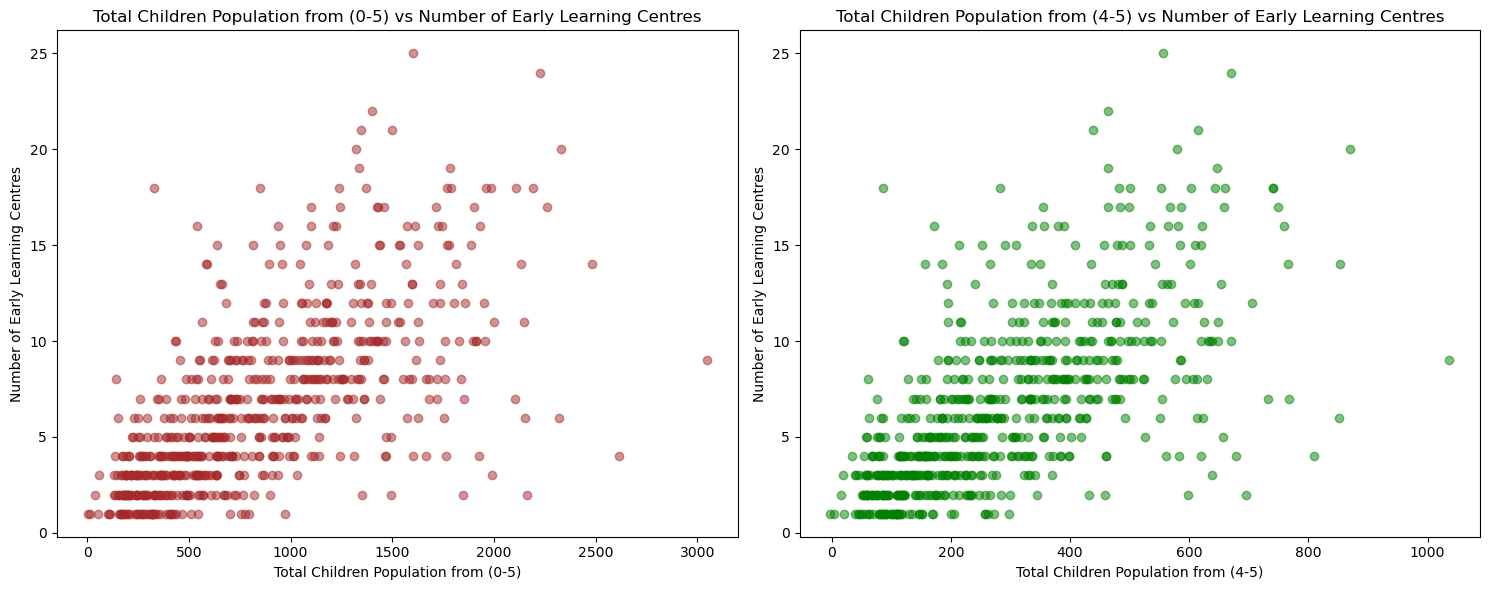

In [13]:
# Removing the outlier
merged_dataset = merged_df[merged_df['ELCentres'] < 100]

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 'Total (0-5)'
axs[0].scatter(merged_dataset['Total (0-5)'], merged_dataset['ELCentres'], alpha=0.5, color='Brown')
axs[0].set_title('Total Children Population from (0-5) vs Number of Early Learning Centres')
axs[0].set_xlabel('Total Children Population from (0-5)')
axs[0].set_ylabel('Number of Early Learning Centres')

# Plot 'Total (4-5)'
axs[1].scatter(merged_dataset['Total (4-5)'], merged_dataset['ELCentres'], alpha=0.5, color='green')
axs[1].set_title('Total Children Population from (4-5) vs Number of Early Learning Centres')
axs[1].set_xlabel('Total Children Population from (4-5)')
axs[1].set_ylabel('Number of Early Learning Centres')

# Display the plots
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Relationship between SEIFA Score and Rank (within State or Territory)')

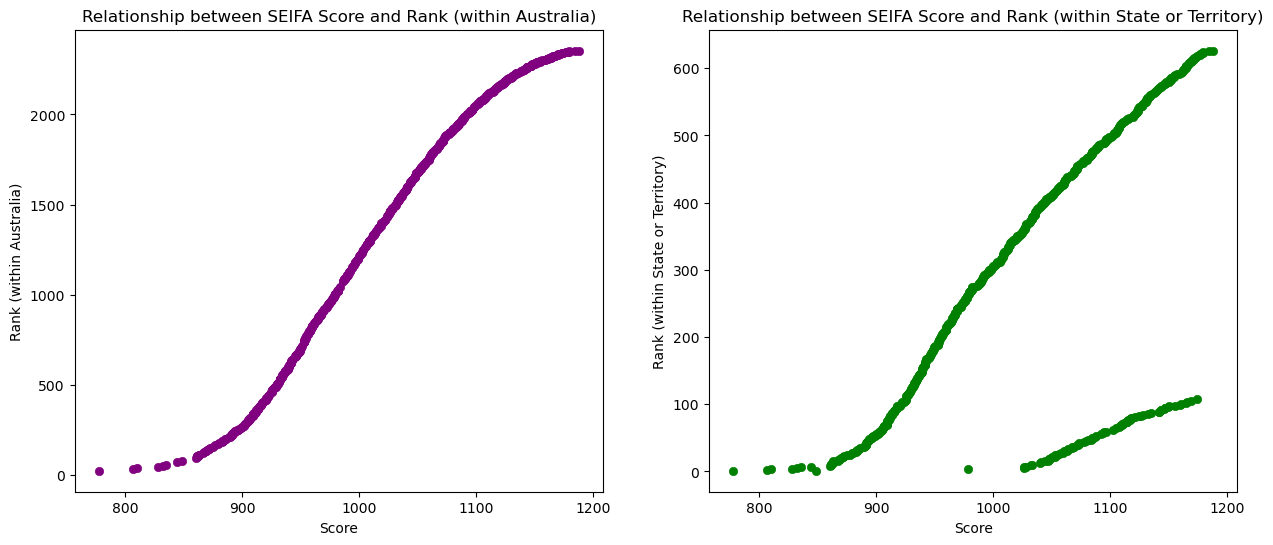

In [14]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) # Note that I increased the figure size to avoid overlapping plots

merged_dataset = merged_dataset[merged_dataset['ELCentres'] < 100]

sns.scatterplot(data=merged_dataset, x='Score', y='Rank (within Australia)', color='Purple', edgecolor='Purple', ax=axs[0])  # Plots the first subplot
axs[0].set_title('Relationship between SEIFA Score and Rank (within Australia)')  # Sets the title for the first subplot

sns.scatterplot(data=merged_dataset, x='Score', y='Rank (within State or Territory)', color='green', edgecolor='green', ax=axs[1])  # Plots the second subplot
axs[1].set_title('Relationship between SEIFA Score and Rank (within State or Territory)')  # Sets the title for the second subplot



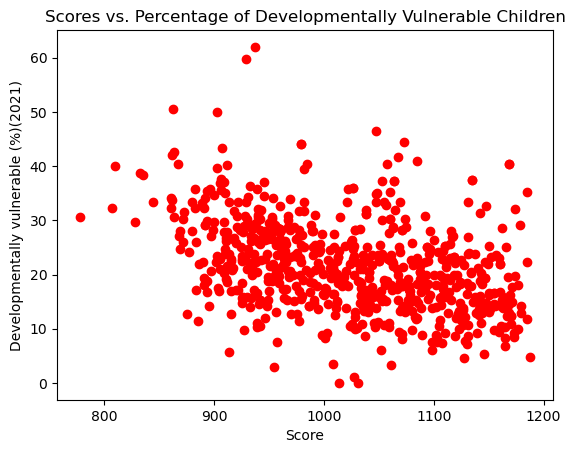

In [15]:
# Convert the column to numeric and drop NaN values
merged_df['Developmentally vulnerable (%)(2021)'] = pd.to_numeric(merged_df['Developmentally vulnerable (%)(2021)'], errors='coerce')
merged_df = merged_df.dropna(subset=['Developmentally vulnerable (%)(2021)'])

#the scatter plot
plt.scatter(merged_df['Score'], merged_df['Developmentally vulnerable (%)(2021)'], color='red', edgecolor='red')
plt.title('Scores vs. Percentage of Developmentally Vulnerable Children')
plt.xlabel('Score')
plt.ylabel('Developmentally vulnerable (%)(2021)')
plt.show()

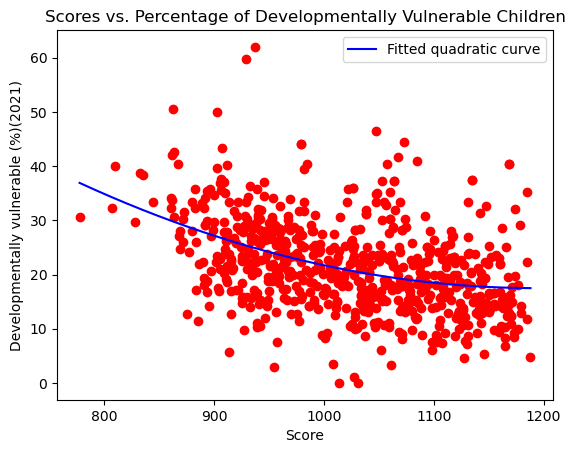

In [16]:
# Fitting an observed quadratic curve for the plot
# Convert the column to numeric and drop NaN values
merged_df['Developmentally vulnerable (%)(2021)'] = pd.to_numeric(merged_df['Developmentally vulnerable (%)(2021)'], errors='coerce')
merged_df = merged_df.dropna(subset=['Developmentally vulnerable (%)(2021)'])

# Define the form of the function we'll fit to the data
def quad_func(x, a, b, c):
    return a*x**2 + b*x + c

# Extract the x and y values from the dataframe
x_values = merged_df['Score'].values
y_values = merged_df['Developmentally vulnerable (%)(2021)'].values

# Fit the quadratic function to the data
popt, _ = curve_fit(quad_func, x_values, y_values)

# The curve_fit function returns the optimal values for a, b, and c
a, b, c = popt

# Generate x values for the curve
x_curve = np.linspace(min(x_values), max(x_values), 1000)

# Generate corresponding y values
y_curve = quad_func(x_curve, a, b, c)

# Plot the data points
plt.scatter(x_values, y_values, color='red', edgecolor='red')

# Plot the fitted curve
plt.plot(x_curve, y_curve, color='blue', label='Fitted quadratic curve')

plt.xlabel('Score')
plt.ylabel('Developmentally vulnerable (%)(2021)')
plt.legend()
plt.title('Scores vs. Percentage of Developmentally Vulnerable Children')
plt.show()


Evidently the relation between these variables suggest that as the seifa score is decreasing or increasing, the Developmentally vulnerable children are strictly decreasing or increasing respectively due to the quadratic nature of the plot. 

**Statistical Anlaysis**

In [17]:
# Grouped Analysis by 'State'
grouped_state = merged_df.groupby('State').agg({'Usual Resident Population': ['mean', 'median', 'std'],
                                                'Score': ['mean', 'median', 'std'],
                                                'ELCentres': ['mean', 'median', 'std'],
                                                'Total (4-5)': ['mean', 'median', 'std']})
grouped_state

Usual Resident Population                              Score  \
                           mean   median          std         mean   
State                                                                
ACT                 4580.849057   3984.0  1951.804434  1094.344541   
NSW                12909.075439  12565.5  5778.884782  1009.939050   

                              ELCentres                  Total (4-5)         \
            median        std      mean median       std        mean median   
State                                                                         
ACT    1093.401193  46.600502  3.743243    3.0  2.341179  116.433962  105.5   
NSW    1000.295074  87.244515  7.079137    6.0  4.561199  311.468421  277.0   

                   
              std  
State              
ACT     66.525329  
NSW    171.132196

In [18]:
# Saving merged_dataset as final_dataset 
merged_dataset.to_csv("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_dataset.csv")

**SPATIAL ANALYSIS**

https://nationalmap.gov.au/

In [19]:
# Reading the final dataset
mgd = pd.read_csv("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_dataset.csv")

In [20]:
# Droppping unwanted column
mgd = mgd.drop('Unnamed: 0', axis=1)

In [21]:
# Loading the GeoJSON data into a GeoDataFrame
geo_data = gpd.read_file("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson")

In [22]:
# Divide the dataset into two based on the 'State' column
mgd_NSW = mgd[mgd['State'] == 'NSW']
mgd_ACT = mgd[mgd['State'] == 'ACT']

In [23]:
# Demand Regions by Child-to-Centre Ratio
mgd_NSW['Demand_regions'] = mgd_NSW['Total (4-5)'] / mgd_NSW['ELCentres']
mgd_ACT['Demand_regions'] = mgd_ACT['Total (4-5)'] / mgd_ACT['ELCentres']


# Demand Regions by number of developmentally vulnerable children to number of EL Centres ratio
mgd_NSW['Developmentally vulnerable (n)(2021)'] = pd.to_numeric(mgd_NSW['Developmentally vulnerable (n)(2021)'], errors='coerce')
mgd_NSW['Vulnerable_demand_regions'] = pd.to_numeric(mgd_NSW['Developmentally vulnerable (n)(2021)'], errors='coerce') / pd.to_numeric(mgd_NSW['ELCentres'], errors='coerce')

mgd_ACT['Developmentally vulnerable (n)(2021)'] = pd.to_numeric(mgd_ACT['Developmentally vulnerable (n)(2021)'], errors='coerce')
mgd_ACT['Vulnerable_demand_regions'] = pd.to_numeric(mgd_ACT['Developmentally vulnerable (n)(2021)'], errors='coerce') / pd.to_numeric(mgd_ACT['ELCentres'], errors='coerce')


'''Quality Score
Assuming the quality metrics 'ExceedingNQS', 'MeetingNQS', 'Excellent', 'WorkingTowardsNQF' and 'SignificantImprovementRequired'
Assigning different weightage points to quality metrics (5 points for each Excellent EL centre, 
4 points for Exceeding,  3 for Meeting, 2 for WorkingTowardsNQF and 1 for SignificantImprovementRequired) to calculate a quality score'''

# calculate the 'Quality_Score' for each state:
mgd_NSW['Quality_Score'] = mgd_NSW['Excellent']*5 + mgd_NSW['ExceedingNQS']*4 + mgd_NSW['MeetingNQS']*3 + mgd_NSW['WorkingTowardsNQF']*2 + mgd_NSW['SignificantImprovementRequired']*1
mgd_ACT['Quality_Score'] = mgd_ACT['Excellent']*5 + mgd_ACT['ExceedingNQS']*4 + mgd_ACT['MeetingNQS']*3 + mgd_ACT['WorkingTowardsNQF']*2 + mgd_ACT['SignificantImprovementRequired']*1


# Filter regions with high demand and low quality score
''' Areas where uniting can open new services (Calculated by filtering Areas with high child to centre ratio 
and low Quality scores of the early learning centres. Can be changed according to different criteria) '''

potential_new_services_NSW = mgd_NSW[
    (mgd_NSW['Demand_regions'] > mgd_NSW['Demand_regions'].median()).fillna(False) &  
    (mgd_NSW['Quality_Score'] < mgd_NSW['Quality_Score'].median()).fillna(False)
]

potential_new_services_ACT = mgd_ACT[
    (mgd_ACT['Demand_regions'] > mgd_ACT['Demand_regions'].median()).fillna(False) &  
    (mgd_ACT['Quality_Score'] < mgd_ACT['Quality_Score'].median()).fillna(False)
]


C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\1133079765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_NSW['Demand_regions'] = mgd_NSW['Total (4-5)'] / mgd_NSW['ELCentres']
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\1133079765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_ACT['Demand_regions'] = mgd_ACT['Total (4-5)'] / mgd_ACT['ELCentres']
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\1133079765.py:7: SettingWithCopyWarning: 
A value is tryin

In [24]:
# Create a new DataFrame for tooltip data
tooltip_data_NSW = mgd_NSW.copy()
tooltip_data_ACT = mgd_ACT.copy()

# Replace the values in each numeric column with the corresponding tooltip string
# For NSW
for col in tooltip_data_NSW.columns:
    if tooltip_data_NSW[col].dtype in ['int64', 'float64'] and col != 'SA2 Code':  # Check if the column is numeric and not 'SA2 Code'
        # Calculate percentile values
        p20, p40, p60, p80 = tooltip_data_NSW[col].quantile([0.2, 0.4, 0.6, 0.8])
        
        # Create a function to assign categories
        def categorize(x):
            if x < p20:
                return f'{x} (Very low)'
            elif p20 <= x < p40:
                return f'{x} (Low)'
            elif p40 <= x < p60:
                return f'{x} (Moderate)'
            elif p60 <= x < p80:
                return f'{x} (High)'
            else:
                return f'{x} (Very high)'
        
        tooltip_data_NSW[col] = tooltip_data_NSW[col].apply(categorize).astype(str)

# For ACT
for col in tooltip_data_ACT.columns:
    if tooltip_data_ACT[col].dtype in ['int64', 'float64'] and col != 'SA2 Code':  # Check if the column is numeric and not 'SA2 Code'
        # Calculate percentile values
        p20, p40, p60, p80 = tooltip_data_ACT[col].quantile([0.2, 0.4, 0.6, 0.8])
        
        # Create a function to assign categories
        def categorize(x):
            if x < p20:
                return f'{x} (Very low)'
            elif p20 <= x < p40:
                return f'{x} (Low)'
            elif p40 <= x < p60:
                return f'{x} (Moderate)'
            elif p60 <= x < p80:
                return f'{x} (High)'
            else:
                return f'{x} (Very high)'
        
        tooltip_data_ACT[col] = tooltip_data_ACT[col].apply(categorize).astype(str)


SEIFA Score analysis

In [25]:
# 20 most disadvantaged areas by SEIFA Score for NSW
lowest_20_rows_NSW = mgd_NSW.nsmallest(20, 'Score') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_NSW['Score'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Score' column
lowest_20_rows_NSW['Score'] = lowest_20_rows_NSW['Score'].apply(categorize)

# Print 'SA2 Name' and 'Score' columns without index
print(lowest_20_rows_NSW[['SA2 Name', 'Score']].to_string(index=False))


                     SA2 Name                  Score
    Ashcroft - Busby - Miller 777.7030965 (Very low)
Bidwill - Hebersham - Emerton 807.1867776 (Very low)
              Tamworth - West 810.3874674 (Very low)
                    Fairfield 828.4619401 (Very low)
        Cabramatta - Lansvale 832.2516428 (Very low)
          Lurnea - Cartwright 835.4585972 (Very low)
                      Kempsey 844.6543401 (Very low)
    Lethbridge Park - Tregear 860.5765554 (Very low)
                        Taree 861.2274535 (Very low)
             Fairfield - East 861.2722565 (Very low)
                       Casino  861.716104 (Very low)
          Beresfield - Hexham 862.8614141 (Very low)
               Nambucca Heads 863.2430993 (Very low)
 Canley Vale - Canley Heights 863.5987049 (Very low)
             Liverpool - West 867.0836355 (Very low)
             Fairfield - West 867.7396705 (Very low)
                     Cessnock 868.9259111 (Very low)
       Mount Hutton - Windale 869.0429764 (Ver

In [26]:
# SEIFA Score Map for NSW

m1_NSW = folium.Map(location=[-32, 150], zoom_start=7) # Location coordinates are for NSW

mgd_NSW['SA2 Name'] = mgd_NSW['SA2 Name'].astype(str)  # Ensure the 'SA2 Name' column is of type string

# Reverse the 'Score' column
mgd_NSW['Reversed_Score'] = mgd_NSW['Score'].max() - mgd_NSW['Score']

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_NSW,
    columns=['SA2 Name', 'Reversed_Score'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='SEIFA Score (Using reversed score so that the darker the colour the worse is the actual SEIFA Score)'
).add_to(m1_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Score'],  # Display SEIFA score
        aliases=['SEIFA Score'],  # Labels for the selected columns
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m1_NSW)

m1_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m1_NSW.html")


C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\271927543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_NSW['SA2 Name'] = mgd_NSW['SA2 Name'].astype(str)  # Ensure the 'SA2 Name' column is of type string
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\271927543.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_NSW['Reversed_Score'] = mgd_NSW['Score'].max() - mgd_NSW['Score']


In [27]:
# 20 most disadvantaged areas by SEIFA Score for ACT
lowest_20_rows_ACT = mgd_ACT.nsmallest(20, 'Score') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_ACT['Score'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Score' column
lowest_20_rows_ACT['Score'] = lowest_20_rows_ACT['Score'].apply(categorize)

# Print 'SA2 Name' and 'Score' columns without index
print(lowest_20_rows_ACT[['SA2 Name', 'Score']].to_string(index=False))


        SA2 Name                  Score
   Canberra East 849.0444107 (Very low)
       Charnwood 978.7637605 (Very low)
Canberra Airport 1026.192887 (Very low)
            Holt 1026.553174 (Very low)
        Chisholm 1028.292794 (Very low)
 Isabella Plains 1032.591115 (Very low)
          Florey 1033.464223 (Very low)
         Scullin 1040.345126 (Very low)
          Latham 1040.865691 (Very low)
     Oxley (ACT) 1044.555983 (Very low)
         Gilmore 1047.104809 (Very low)
         Higgins 1047.529069 (Very low)
        Theodore 1047.530625 (Very low)
 Macgregor (ACT) 1048.069854 (Very low)
          Kambah 1049.323948 (Very low)
    Gordon (ACT) 1050.117375 (Very low)
        Greenway 1052.522454 (Very low)
       Ngunnawal 1052.879042 (Very low)
          Conder      1052.930135 (Low)
       Macquarie      1054.741841 (Low)


In [28]:
# SEIFA Score Map for ACT

m1_ACT = folium.Map(location=[-35.2809, 149.1300], zoom_start=7) # Location coordinates are for ACT

mgd_ACT['SA2 Name'] = mgd_ACT['SA2 Name'].astype(str)  # Ensure the 'SA2 Name' column is of type string

# Reverse the 'Score' column
mgd_ACT['Reversed_Score'] = mgd_ACT['Score'].max() - mgd_ACT['Score']

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_ACT,
    columns=['SA2 Name', 'Reversed_Score'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='SEIFA Score (Using reversed score so that the darker the colour the worse is the actual SEIFA Score)'
).add_to(m1_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Score'],  # Display SEIFA score
        aliases=['SEIFA Score'],  # Labels for the selected columns
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m1_ACT)

m1_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m1_ACT.html")

C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\1378346558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_ACT['SA2 Name'] = mgd_ACT['SA2 Name'].astype(str)  # Ensure the 'SA2 Name' column is of type string
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\1378346558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_ACT['Reversed_Score'] = mgd_ACT['Score'].max() - mgd_ACT['Score']


Number of Vulnerable children Analysis

In [29]:
# 20 most disadvantaged areas by Vulnerable children is to number of EL Centres Ratio for NSW
highest_20_rows_NSW = mgd_NSW.nlargest(20, 'Vulnerable_demand_regions') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_NSW['Vulnerable_demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Vulnerable_demand_regions' column
highest_20_rows_NSW['Vulnerable_demand_regions'] = highest_20_rows_NSW['Vulnerable_demand_regions'].apply(categorize)

# Print 'SA2 Name' and 'Vulnerable_demand_regions' columns without index
print(highest_20_rows_NSW[['SA2 Name', 'Vulnerable_demand_regions']].to_string(index=False))

                     SA2 Name      Vulnerable_demand_regions
    Jordan Springs - Llandilo               33.5 (Very high)
   Marsden Park - Shanes Park               31.0 (Very high)
Bidwill - Hebersham - Emerton               24.5 (Very high)
                       Leeton               24.0 (Very high)
    Lethbridge Park - Tregear 22.666666666666668 (Very high)
       Korora - Emerald Beach               20.0 (Very high)
              Moree Surrounds               20.0 (Very high)
                    Oran Park               20.0 (Very high)
            Queanbeyan - East               19.0 (Very high)
            Box Hill - Nelson               19.0 (Very high)
 Leppington - Catherine Field               19.0 (Very high)
              Dubbo Surrounds               18.0 (Very high)
 Umina - Booker Bay - Patonga               17.5 (Very high)
                        Moama               17.0 (Very high)
              Bathurst - West               16.8 (Very high)
           Carlingford -

In [30]:
# Map of High Demand Regions by vulnerable children for NSW

m2_NSW = folium.Map(location=[-32, 150], zoom_start=7)

# Create a choropleth map for Vulnerable_demand_regions
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_NSW,
    columns=['SA2 Name', 'Vulnerable_demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Demand Regions for Vulnerable Children'
).add_to(m2_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Vulnerable_demand_regions'],  # Display 'Vulnerable_demand_regions' on hover
        aliases=['Vulnerable Children to Early Learning Centres'],  # Label for 'Vulnerable_demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m2_NSW)

m2_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m2_NSW.html")


In [31]:
# 20 most disadvantaged areas by Vulnerable children is to number of EL Centres Ratio for ACT
highest_20_rows_ACT = mgd_ACT.nlargest(20, 'Vulnerable_demand_regions') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_ACT['Vulnerable_demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Vulnerable_demand_regions' column
highest_20_rows_ACT['Vulnerable_demand_regions'] = highest_20_rows_ACT['Vulnerable_demand_regions'].apply(categorize)

# Print 'SA2 Name' and 'Vulnerable_demand_regions' columns without index
print(highest_20_rows_ACT[['SA2 Name', 'Vulnerable_demand_regions']].to_string(index=False))


       SA2 Name     Vulnerable_demand_regions
          Casey              35.0 (Very high)
          Crace              23.0 (Very high)
         Taylor              18.0 (Very high)
Denman Prospect              17.0 (Very high)
         Bonner              14.5 (Very high)
        Higgins              14.0 (Very high)
      Ngunnawal              13.0 (Very high)
     Palmerston              10.5 (Very high)
          Melba               9.5 (Very high)
         Watson 9.333333333333334 (Very high)
         Downer               9.0 (Very high)
         Monash               9.0 (Very high)
          Evatt               8.0 (Very high)
       Theodore               7.5 (Very high)
       Chisholm 7.333333333333333 (Very high)
      Macarthur                    7.0 (High)
       Harrison                    6.8 (High)
        Gilmore                    6.5 (High)
       Bonython      6.333333333333333 (High)
         Coombs      6.333333333333333 (High)


In [32]:
# Map of High Demand Regions by vulnerable children for ACT

m2_ACT = folium.Map(location=[-35.2809, 149.1300], zoom_start=7)

# Create a choropleth map for Vulnerable_demand_regions
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_ACT,
    columns=['SA2 Name', 'Vulnerable_demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Demand Regions for Vulnerable Children'
).add_to(m2_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Vulnerable_demand_regions'],  # Display 'Vulnerable_demand_regions' on hover
        aliases=['Vulnerable Children to Early Learning Centres'],  # Label for 'Vulnerable_demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m2_ACT)

m2_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m2_ACT.html")


Quality of early learning centres analysis

In [33]:
# 20 most disadvantaged areas by Quality of early learning centres ("Quality_Score" column) for NSW
highest_20_rows_NSW = mgd_NSW.nsmallest(20, 'Quality_Score') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_NSW['Quality_Score'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Quality_Score' column
highest_20_rows_NSW['Quality_Score'] = highest_20_rows_NSW['Quality_Score'].apply(categorize)

# Print 'SA2 Name' and 'Quality_Score' columns without index
print(highest_20_rows_NSW[['SA2 Name', 'Quality_Score']].to_string(index=False))


                   SA2 Name  Quality_Score
                     Oberon 0.0 (Very low)
            Cowra Surrounds 0.0 (Very low)
            Dubbo Surrounds 0.0 (Very low)
     Muswellbrook Surrounds 0.0 (Very low)
   Port Macquarie Surrounds 0.0 (Very low)
                     Corowa 0.0 (Very low)
         Gunnedah Surrounds 0.0 (Very low)
                   Quirindi 0.0 (Very low)
Terranora - North Tumbulgum 0.0 (Very low)
  Robertson - Fitzroy Falls 0.0 (Very low)
         Southern Highlands 0.0 (Very low)
          Queanbeyan - East 2.0 (Very low)
            Calga - Kulnura 2.0 (Very low)
   Kiama Downs - Minnamurra 2.0 (Very low)
        Ulladulla Surrounds 2.0 (Very low)
                   Chullora 2.0 (Very low)
          Strathfield South 2.0 (Very low)
    Silverwater - Newington 2.0 (Very low)
            Cooma Surrounds 3.0 (Very low)
     Eurobodalla Hinterland 3.0 (Very low)


In [34]:
# Map of Areas with Potential for new Services for NSW

m3_NSW = folium.Map(location=[-32, 150], zoom_start=7)

mgd_NSW['SA2 Name'] = mgd_NSW['SA2 Name'].astype(str)

# Reverse the 'Quality_Score' column
mgd_NSW['Reversed_Quality_Score'] = mgd_NSW['Quality_Score'].max() - mgd_NSW['Quality_Score']

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_NSW,
    columns=['SA2 Name', 'Reversed_Quality_Score'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='EL Centres Quality Score (Using reversed score so that the darker the colour the worse is the actual Quality Score)'
).add_to(m3_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m3_NSW)

m3_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m3_NSW.html")


C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\3927011977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_NSW['SA2 Name'] = mgd_NSW['SA2 Name'].astype(str)
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\3927011977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_NSW['Reversed_Quality_Score'] = mgd_NSW['Quality_Score'].max() - mgd_NSW['Quality_Score']


In [35]:
# 20 most disadvantaged areas by Quality of early learning centres ("Quality_Score" column) for ACT
highest_20_rows_ACT = mgd_ACT.nsmallest(20, 'Quality_Score') # Change the number to the desired value here it is 20 for default

# Calculate percentile values
p20, p40, p60, p80 = mgd_ACT['Quality_Score'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Quality_Score' column
highest_20_rows_ACT['Quality_Score'] = highest_20_rows_ACT['Quality_Score'].apply(categorize)

# Print 'SA2 Name' and 'Quality_Score' columns without index
print(highest_20_rows_ACT[['SA2 Name', 'Quality_Score']].to_string(index=False))


        SA2 Name  Quality_Score
         Higgins 2.0 (Very low)
          Majura 2.0 (Very low)
           Crace 2.0 (Very low)
       Macarthur 2.0 (Very low)
        McKellar 3.0 (Very low)
Canberra Airport 3.0 (Very low)
          Isaacs 3.0 (Very low)
 Denman Prospect 3.0 (Very low)
           Casey 4.0 (Very low)
          Taylor 4.0 (Very low)
          Downer 4.0 (Very low)
     Oxley (ACT) 4.0 (Very low)
ACT - South West 4.0 (Very low)
          Fraser 5.0 (Very low)
   Canberra East 5.0 (Very low)
         Gilmore 5.0 (Very low)
      Weetangera 6.0 (Very low)
         Throsby 6.0 (Very low)
          Hawker      7.0 (Low)
          Latham      7.0 (Low)


In [36]:
# Map of Areas with Potential for new Services for ACT

m3_ACT = folium.Map(location=[-35.2809, 149.1300], zoom_start=7)

mgd_ACT['SA2 Name'] = mgd_ACT['SA2 Name'].astype(str)

# Reverse the 'Quality_Score' column
mgd_ACT['Reversed_Quality_Score'] = mgd_ACT['Quality_Score'].max() - mgd_ACT['Quality_Score']

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=mgd_ACT,
    columns=['SA2 Name', 'Reversed_Quality_Score'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='EL Centres Quality Score (Using reversed score so that the darker the colour the worse is the actual Quality Score)'
).add_to(m3_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m3_ACT)

m3_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m3_ACT.html")


C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\2998412839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_ACT['SA2 Name'] = mgd_ACT['SA2 Name'].astype(str)
C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\2998412839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mgd_ACT['Reversed_Quality_Score'] = mgd_ACT['Quality_Score'].max() - mgd_ACT['Quality_Score']


Areas with Potential for New Services

In [37]:
# 20 most disadvantaged areas where uniting can open new services for NSW
highest_20_rows_NSW = potential_new_services_NSW.nlargest(20, 'Demand_regions')

# Calculate percentile values
p20, p40, p60, p80 = potential_new_services_NSW['Demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Demand_regions' column
highest_20_rows_NSW['Demand_regions'] = highest_20_rows_NSW['Demand_regions'].apply(categorize)

# Print 'SA2 Name' and 'Demand_regions' columns without index
print(highest_20_rows_NSW[['SA2 Name']].to_string(index=False))


                     SA2 Name
   Marsden Park - Shanes Park
    Jordan Springs - Llandilo
                      Googong
                       Leeton
       Korora - Emerald Beach
                Bellevue Hill
 Leppington - Catherine Field
            Box Hill - Nelson
        Denham Court - Bardia
                    Oran Park
     Avoca Beach - Copacabana
            Kellyville - West
     Kiama Downs - Minnamurra
             North Kellyville
                     Quirindi
Bidwill - Hebersham - Emerton
 Summerland Point - Gwandalan
              Moree Surrounds
                        Moama
              Dubbo Surrounds


In [38]:
# Map of Areas with Potential for new Services for NSW

m4_NSW = folium.Map(location=[-32, 150], zoom_start=7)

potential_new_services_NSW['SA2 Name'] = potential_new_services_NSW['SA2 Name'].astype(str)

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=potential_new_services_NSW,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Areas with Potential for new Services'
).add_to(m4_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m4_NSW)

m4_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m4_NSW.html")


C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\392081188.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_new_services_NSW['SA2 Name'] = potential_new_services_NSW['SA2 Name'].astype(str)


In [39]:
# 20 most disadvantaged areas where uniting can open new services for ACT
highest_20_rows_ACT = potential_new_services_ACT.nlargest(20, 'Demand_regions')

# Calculate percentile values
p20, p40, p60, p80 = potential_new_services_ACT['Demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories
def categorize(x):
    if x < p20:
        return f'{x} (Very low)'
    elif p20 <= x < p40:
        return f'{x} (Low)'
    elif p40 <= x < p60:
        return f'{x} (Moderate)'
    elif p60 <= x < p80:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Demand_regions' column
highest_20_rows_ACT['Demand_regions'] = highest_20_rows_ACT['Demand_regions'].apply(categorize)

# Print 'SA2 Name' and 'Demand_regions' columns without index
print(highest_20_rows_ACT[['SA2 Name', 'Demand_regions']].to_string(index=False))


       SA2 Name                Demand_regions
          Casey             272.0 (Very high)
          Crace             206.0 (Very high)
         Bonner             149.5 (Very high)
Macgregor (ACT)             117.5 (Very high)
Denman Prospect             117.0 (Very high)
         Downer             113.0 (Very high)
         Taylor                  110.0 (High)
        Higgins                  102.0 (High)
     Palmerston                   87.5 (High)
         Monash                   71.0 (High)
       Franklin      68.33333333333333 (High)
       McKellar               63.0 (Moderate)
        Throsby               59.0 (Moderate)
         Latham               56.0 (Moderate)
          Melba               55.5 (Moderate)
       Theodore               55.0 (Moderate)
       Chisholm 50.666666666666664 (Moderate)
         Rivett                    47.0 (Low)
    Oxley (ACT)                    46.0 (Low)
      Macarthur                    45.0 (Low)


In [40]:
# Map of Areas with Potential for new Services for ACT

m4_ACT = folium.Map(location=[-35.2809, 149.1300], zoom_start=7)

potential_new_services_ACT['SA2 Name'] = potential_new_services_ACT['SA2 Name'].astype(str)

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=potential_new_services_ACT,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Areas with Potential for new Services'
).add_to(m4_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

# Modify the map code to display tooltips and popups only for the selected columns
geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m4_ACT)

m4_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m4_ACT.html")

C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\3225942837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_new_services_ACT['SA2 Name'] = potential_new_services_ACT['SA2 Name'].astype(str)


**Identifying Childcare Deserts (For NSW)**

In [41]:
# Identifying Childcare Deserts for NSW
desert_df_NSW = mgd_NSW[mgd_NSW['Demand_regions'] > 3]

# Get basic statistics
stats_NSW = mgd_NSW['Demand_regions'].describe()

# Get median
median_NSW = mgd_NSW['Demand_regions'].median()

# Print all statistics
print("NSW Statistics:")
print("Min: ", stats_NSW['min'])
print("Max: ", stats_NSW['max'])
print("Mean: ", stats_NSW['mean'])
print("Median: ", median_NSW)
print("Standard deviation: ", stats_NSW['std'])

NSW Statistics:
Min:  4.833333333333333
Max:  348.0
Mean:  55.99757115265558
Median:  45.25
Standard deviation:  39.63208841154334


In [42]:
# Childcare Desert map following the ratios specified in the childcare desert report for NSW
m5_NSW = folium.Map(location=[-32, 150], zoom_start=7)

desert_df_NSW['SA2 Name'] = desert_df_NSW['SA2 Name'].astype(str)

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=desert_df_NSW,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Childcare Deserts according to the childcare desert report'
).add_to(m5_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Demand_regions'],  # Display 'Demand_regions' on hover
        aliases=['Desert Score'],  # Label for 'Demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m5_NSW)

m5_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m5_NSW.html")

**Identifying Childcare Deserts (For ACT)**

In [43]:
# Identifying Childcare Deserts for ACT
desert_df_ACT = mgd_ACT[mgd_ACT['Demand_regions'] > 3]

# Get basic statistics
stats_ACT = mgd_ACT['Demand_regions'].describe()

# Get median
median_ACT = mgd_ACT['Demand_regions'].median()

# Print all statistics
print("ACT Statistics:")
print("Min: ", stats_ACT['min'])
print("Max: ", stats_ACT['max'])
print("Mean: ", stats_ACT['mean'])
print("Median: ", median_ACT)
print("Standard deviation: ", stats_ACT['std'])

ACT Statistics:
Min:  -2.0
Max:  272.0
Mean:  42.463742674949565
Median:  29.5
Standard deviation:  42.27729562140995


In [44]:
# Childcare Desert map following the ratios specified in the childcare desert report for ACT
m5_ACT = folium.Map(location=[-35.2809, 149.1300], zoom_start=7)

desert_df_ACT['SA2 Name'] = desert_df_ACT['SA2 Name'].astype(str)

# Create a choropleth map
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=desert_df_ACT,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Childcare Deserts according to the childcare desert report'
).add_to(m5_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Demand_regions'],  # Display 'Demand_regions' on hover
        aliases=['Desert Score'],  # Label for 'Demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map
geojson.add_to(m5_ACT)

m5_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m5_ACT.html")

C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\8808231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desert_df_ACT['SA2 Name'] = desert_df_ACT['SA2 Name'].astype(str)


**Our Interpretation of the Desert Regions (In NSW)**

In [45]:
# Calculate the mean and standard deviation of 'Demand_regions' for NSW
mean_demand_regions_NSW = mgd_NSW['Demand_regions'].mean()
std_demand_regions_NSW = mgd_NSW['Demand_regions'].std()

# Calculate the threshold as the mean of 'Demand_regions' for NSW
threshold_NSW = mean_demand_regions_NSW 

# Create a new dataframe that only includes rows where 'Demand_regions' is above the threshold for NSW
desert_df_NSW = mgd_NSW[mgd_NSW['Demand_regions'] > threshold_NSW]

# 20 most Deserted regions for NSW
highest_20_rows_NSW = desert_df_NSW.nlargest(20, 'Demand_regions') 

# Calculate percentile values for NSW
p20_NSW, p40_NSW, p60_NSW, p80_NSW = desert_df_NSW['Demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories for NSW
def categorize_NSW(x):
    if x < p20_NSW:
        return f'{x} (Very low)'
    elif p20_NSW <= x < p40_NSW:
        return f'{x} (Low)'
    elif p40_NSW <= x < p60_NSW:
        return f'{x} (Moderate)'
    elif p60_NSW <= x < p80_NSW:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Demand_regions' column for NSW
highest_20_rows_NSW['Demand_regions'] = highest_20_rows_NSW['Demand_regions'].apply(categorize_NSW)

# Print 'SA2 Name' and 'Demand_regions' columns without index for NSW
print(highest_20_rows_NSW[['SA2 Name', 'Demand_regions']].to_string(index=False))

                     SA2 Name                 Demand_regions
   Marsden Park - Shanes Park              348.0 (Very high)
    Jordan Springs - Llandilo              299.0 (Very high)
                      Googong              298.0 (Very high)
                       Leeton              262.0 (Very high)
       Korora - Emerald Beach              258.0 (Very high)
                Bellevue Hill              258.0 (Very high)
 Leppington - Catherine Field              229.5 (Very high)
            Box Hill - Nelson              216.0 (Very high)
        Denham Court - Bardia 212.66666666666666 (Very high)
                    Oran Park             202.25 (Very high)
     Avoca Beach - Copacabana              201.0 (Very high)
            Kellyville - West              172.5 (Very high)
     Kiama Downs - Minnamurra              170.0 (Very high)
             North Kellyville              169.5 (Very high)
                     Quirindi              168.0 (Very high)
Bidwill - Hebersham - Em

In [46]:
# Childcare Deserts according to our interpretation for NSW
m6_NSW = folium.Map(location=[-32, 150], zoom_start=7) 

desert_df_NSW['SA2 Name'] = desert_df_NSW['SA2 Name'].astype(str)

# Create a choropleth map for NSW
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=desert_df_NSW,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Childcare Deserts according to our interpretation'
).add_to(m6_NSW)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column for NSW
tooltip_data_geo_NSW = geo_data.merge(tooltip_data_NSW, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup for NSW
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

geojson = GeoJson(
    tooltip_data_geo_NSW,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Demand_regions'],  # Display 'Demand_regions' on hover
        aliases=['Desert Score'],  # Label for 'Demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map for NSW
geojson.add_to(m6_NSW)

m6_NSW.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m6_NSW.html")

C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\882035013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desert_df_NSW['SA2 Name'] = desert_df_NSW['SA2 Name'].astype(str)


**Our Interpretation of the Desert Regions (In ACT)**

In [47]:
# Calculate the mean and standard deviation of 'Demand_regions' for ACT
mean_demand_regions_ACT = mgd_ACT['Demand_regions'].mean()
std_demand_regions_ACT = mgd_ACT['Demand_regions'].std()

# Calculate the threshold as the mean of 'Demand_regions' for ACT
threshold_ACT = mean_demand_regions_ACT 

# Create a new dataframe that only includes rows where 'Demand_regions' is above the threshold for ACT
desert_df_ACT = mgd_ACT[mgd_ACT['Demand_regions'] > threshold_ACT]

# 20 most Deserted regions for ACT
highest_20_rows_ACT = desert_df_ACT.nlargest(20, 'Demand_regions') 

# Calculate percentile values for ACT
p20_ACT, p40_ACT, p60_ACT, p80_ACT = desert_df_ACT['Demand_regions'].quantile([0.2, 0.4, 0.6, 0.8])

# Create a function to assign categories for ACT
def categorize_ACT(x):
    if x < p20_ACT:
        return f'{x} (Very low)'
    elif p20_ACT <= x < p40_ACT:
        return f'{x} (Low)'
    elif p40_ACT <= x < p60_ACT:
        return f'{x} (Moderate)'
    elif p60_ACT <= x < p80_ACT:
        return f'{x} (High)'
    else:
        return f'{x} (Very high)'

# Apply categorization to 'Demand_regions' column for ACT
highest_20_rows_ACT['Demand_regions'] = highest_20_rows_ACT['Demand_regions'].apply(categorize_ACT)

# Print 'SA2 Name' and 'Demand_regions' columns without index for ACT
print(highest_20_rows_ACT[['SA2 Name', 'Demand_regions']].to_string(index=False))

       SA2 Name                Demand_regions
          Casey             272.0 (Very high)
          Crace             206.0 (Very high)
         Bonner             149.5 (Very high)
Macgregor (ACT)             117.5 (Very high)
Denman Prospect             117.0 (Very high)
         Downer             113.0 (Very high)
         Taylor                  110.0 (High)
        Higgins                  102.0 (High)
      Ngunnawal                  99.75 (High)
     Palmerston                   87.5 (High)
         Monash                   71.0 (High)
       Franklin  68.33333333333333 (Moderate)
       McKellar               63.0 (Moderate)
         Coombs 61.666666666666664 (Moderate)
         Watson 59.333333333333336 (Moderate)
        Throsby               59.0 (Moderate)
   Gordon (ACT)              58.75 (Moderate)
       Harrison                    57.0 (Low)
         Latham                    56.0 (Low)
          Melba                    55.5 (Low)


In [48]:
# Childcare Deserts according to our interpretation for ACT
m6_ACT = folium.Map(location=[-35.3, 149.1], zoom_start=10) 

desert_df_ACT['SA2 Name'] = desert_df_ACT['SA2 Name'].astype(str)

# Create a choropleth map for ACT
folium.Choropleth(
    geo_data="C:/Users/Shivatmak Sharma/Desktop/Internship Work/Datasets/final_geo.geojson",
    name='choropleth',
    data=desert_df_ACT,
    columns=['SA2 Name', 'Demand_regions'],
    key_on='feature.properties.SA2_NAME21',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Childcare Deserts according to our interpretation'
).add_to(m6_ACT)

# Merge tooltip_data with the GeoDataFrame based on the 'SA2 Name' column for ACT
tooltip_data_geo_ACT = geo_data.merge(tooltip_data_ACT, left_on='SA2_NAME21', right_on='SA2 Name')

# Specify the columns you want to include in the tooltip and popup for ACT
select_columns = ['SA2 Code','SA2 Name','Score', 'Usual Resident Population', 'Total (0-5)', 'Total (4-5)','Demand_regions', 'Rank (within Australia)', 'Rank (within State or Territory)', 'Developmentally vulnerable (%)(2021)', 'ELCentres', 'Quality_Score']  

geojson = GeoJson(
    tooltip_data_geo_ACT,
    style_function=lambda feature: {
        'fillColor': 'transparent',  # Make the GeoJson layer transparent
        'color': 'transparent'  # Make the border transparent
    },
    tooltip=GeoJsonTooltip(
        fields=['Demand_regions'],  # Display 'Demand_regions' on hover
        aliases=['Desert Score'],  # Label for 'Demand_regions'
        localize=True
    ),
    popup=GeoJsonPopup(
        fields=select_columns,  # Display only the selected columns on click
        aliases=select_columns,  # Labels for the selected columns
        localize=True
    )
)

# Add the GeoJson object to the map for ACT
geojson.add_to(m6_ACT)

m6_ACT.save("C:/Users/Shivatmak Sharma/Desktop/Internship Work/Maps/m6_ACT.html")

C:\Users\Shivatmak Sharma\AppData\Local\Temp\ipykernel_4564\2759618043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desert_df_ACT['SA2 Name'] = desert_df_ACT['SA2 Name'].astype(str)
